In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn
import os
from sklearn import linear_model

# Franke Function

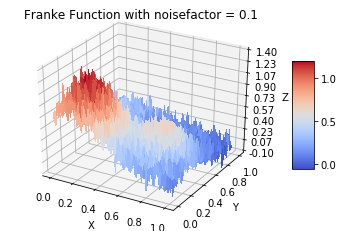

In [187]:
# Make data.
N = 70
noisefactor = 0.1
x,y,z = fn.init_data(N,noisefactor)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Franke Function with noisefactor = {}".format(noisefactor))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# OLS

The MSE for the prediciton is:
0.012642620736347612 

The R2 for the prediciton is:
0.8658053725873116 



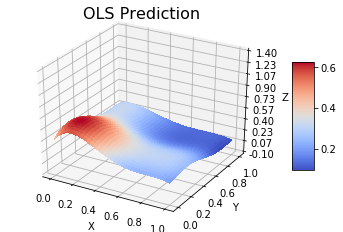

In [188]:
# Initializing the data
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction')

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.012321966605219345 

The R2 for the prediciton is:
0.8626117068368799 



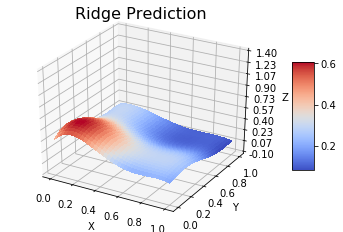

In [189]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Penalty Term
lamb = 1e-3

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train)+lamb*np.eye(len(X_train[0])))

# Estimating the Ordinary Least Squares Beta Matrix
RIDGEbeta = XTXinv.dot(X_train.T).dot(z_train) 



# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction')


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS

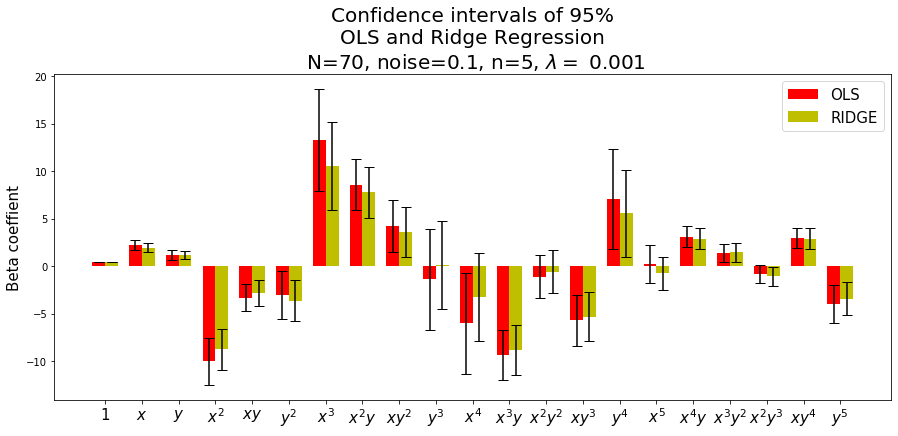

In [190]:
# Plotting the figure


labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.35

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(ind, OLSbeta, width, color = 'r', yerr=2*betavar_OLS, capsize=5)

rects2 = ax.bar(ind+width, RIDGEbeta, width, color = 'y', yerr=2*betavar_RIDGE, capsize=5)


ax.set_ylabel('Beta coeffient', fontsize=15)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\nOLS and Ridge Regression\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0]), ('OLS', 'RIDGE'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



# LASSO

The MSE for the prediciton is:
0.015473780593549938 

The R2 for the prediciton is:
0.8364976945626399 



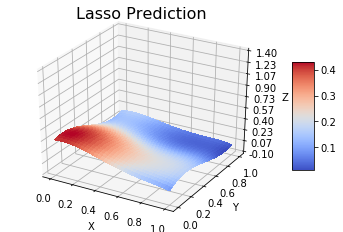

In [191]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 5
lamb = 1e-4


# Intializing the dataset
x, y, z = fn.init_data(N, noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

clf = linear_model.Lasso(alpha=lamb, fit_intercept=False, max_iter=100000, tol=0.01)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction')


# Bootstrapping

In [192]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z=z.ravel()


# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 100

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_train, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_test @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

## k fold cross validation

In [195]:
# Data Parameters
N = 70
noisefactor = 0.1
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()

# penalty term
lamb = np.logspace(-5,0,6)

# CV fold parameters 
folds = 5


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        # Creating design matrix for polynomial degree n
        X = fn.create_X(x,y,i)
        
        # Setting up the array for the k fold predictions
        foldsize = np.int(N**2/folds)        
        z_pred = np.empty((foldsize, folds))
        
        # Shuffling the dataset
        X, z = fn.Shuffle_Data(X,z,replacement=False)    #replacement = false means not resampling the same point twice.
        foldmask = fn.k_foldsplit(len(X),folds)
        
        for j in range(folds):
            X_train, z_train = X[foldmask[:,j]] , z[foldmask[:,j]]
            X_test , z_test = X[~foldmask[:,j]] , z[~foldmask[:,j]]
            #z_train = z[foldmask[:,j]]
            #z_test  = z[~foldmask[:,j]]
            
            # Standard scaling (subtracting the mean)
            X_train, X_test = fn.Scaling(X_train, X_test)
            
            # Fitting model and predicting
            RIDGEbeta = fn.SVDinv(X_train.T.dot(X_train)+lamb[k]*np.eye(len(X_train[0]))).dot(X_train.T).dot(z_train) 
            z_pred[:,j] = X_test @ RIDGEbeta

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)

        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20:

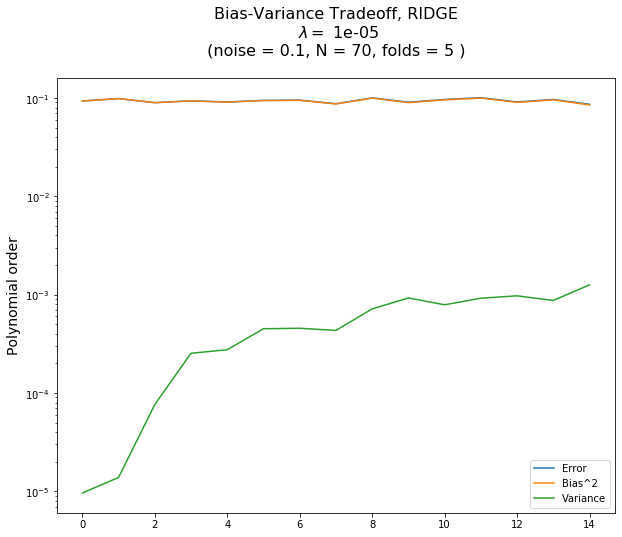

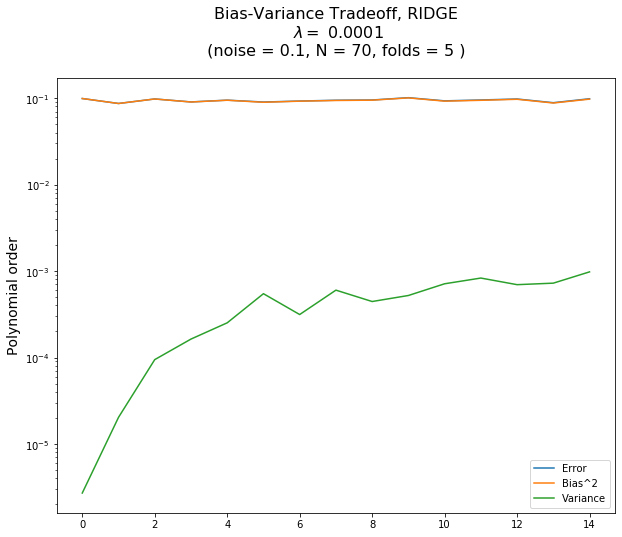

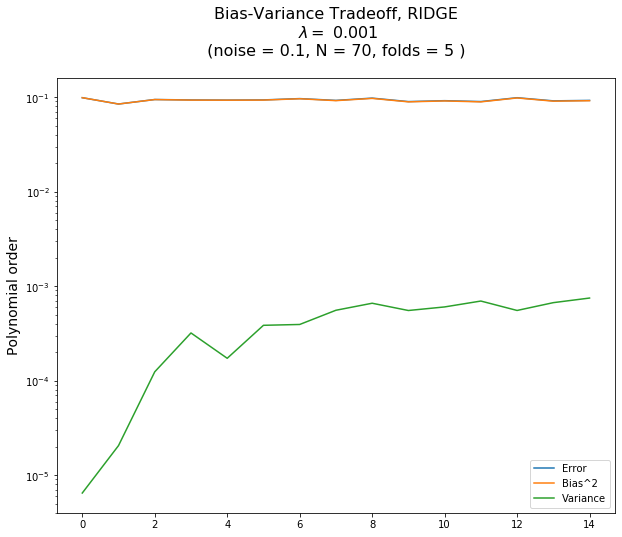

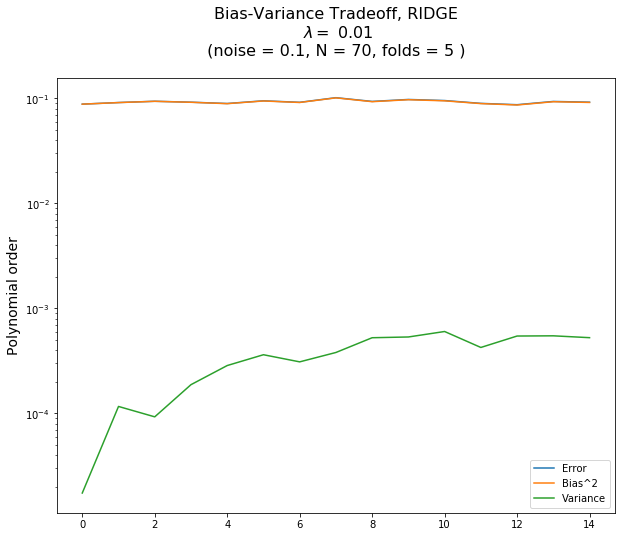

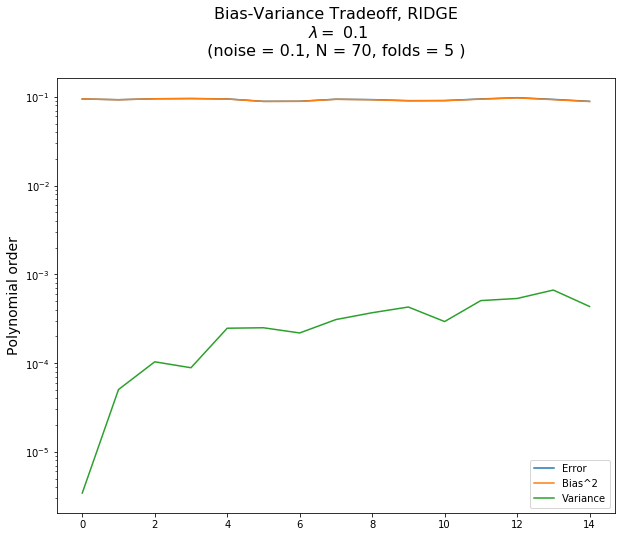

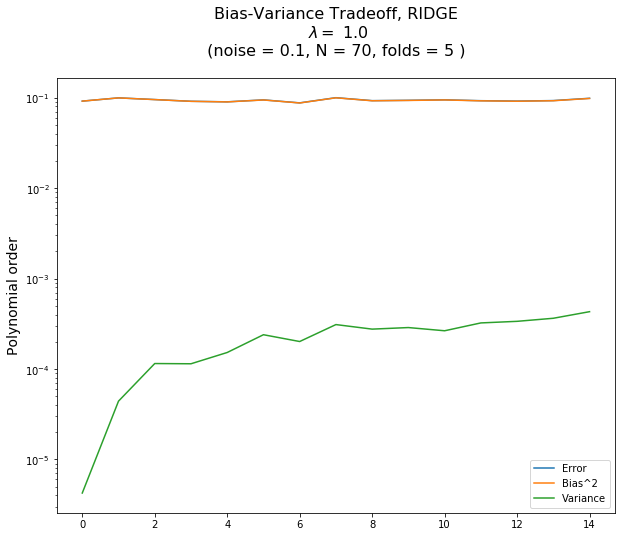

In [196]:
startpoint = 0
endpoint = 15
for k in range(len(lamb)):
    fig, ax = plt.subplots(figsize=(10,8))

    ax.plot(np.arange(n)[startpoint:endpoint], error[k,startpoint:endpoint], label='Error')
    ax.plot(np.arange(n)[startpoint:endpoint], bias[k,startpoint:endpoint], label='Bias^2')
    ax.plot(np.arange(n)[startpoint:endpoint], variance[k,startpoint:endpoint], label='Variance')



    ax.set_ylabel("Error", fontsize=14)
    ax.set_ylabel("Polynomial order",  fontsize=14)
    ax.set_title("Bias-Variance Tradeoff, RIDGE\n $\lambda=$ {0}\n (noise = {1}, N = {2}, folds = {3} ) \n".format(lamb[k],noisefactor, N, folds), fontsize =16)


    ax.set_yscale("log")
    ax.legend()
    #plt.savefig("Results/BootstrapOLSBiasVariance.png", dpi=100)
    fig.show()


# RIDGE BOOTSTRAPPING

In [36]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)


# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))



for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

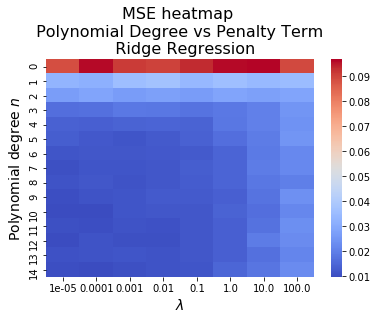

In [37]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

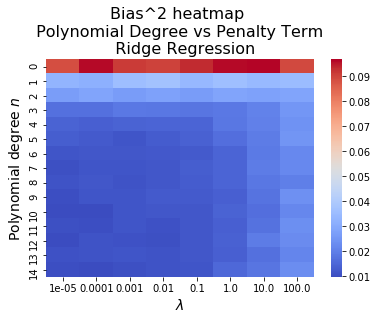

In [38]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

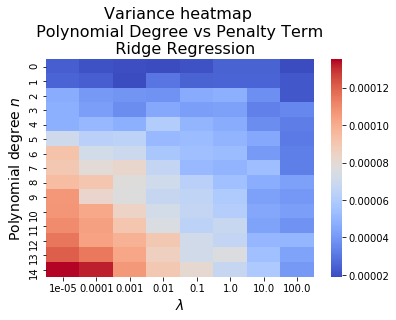

In [39]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20:

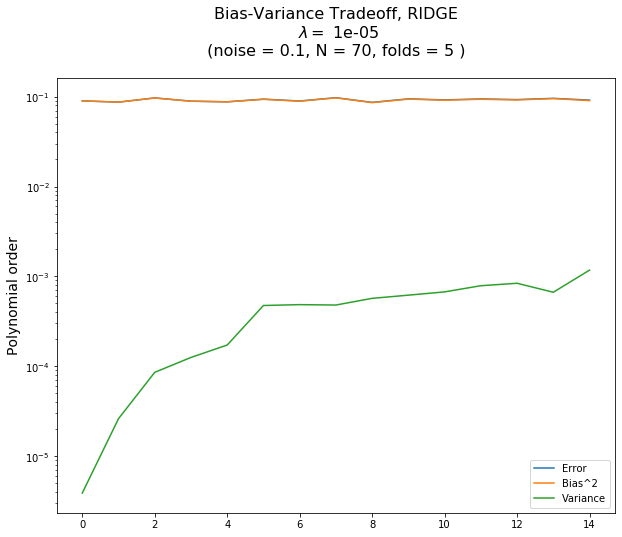

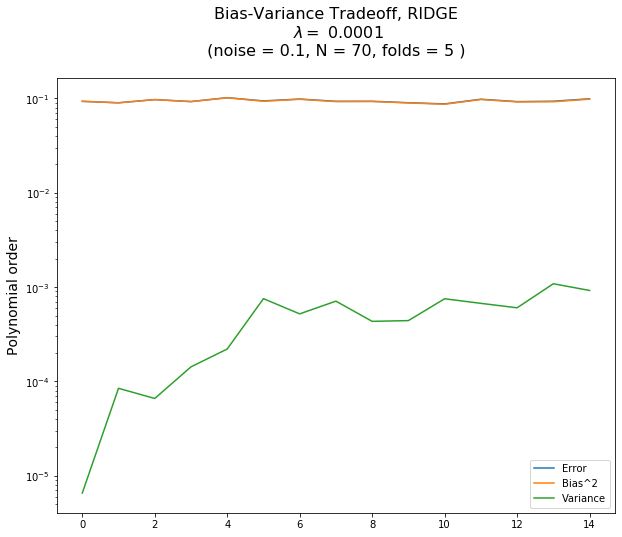

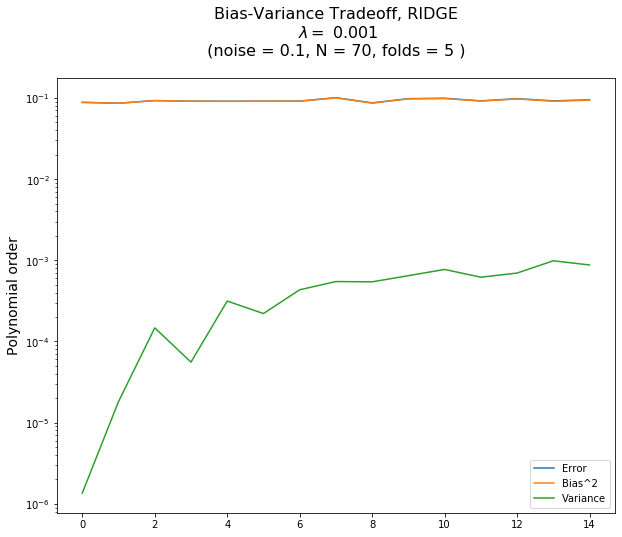

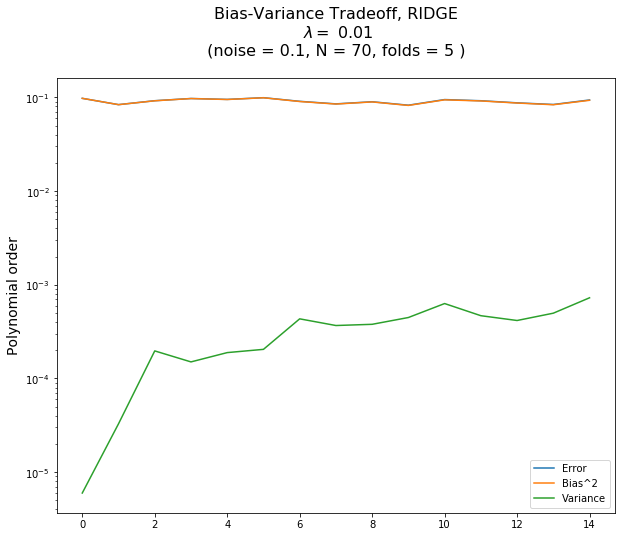

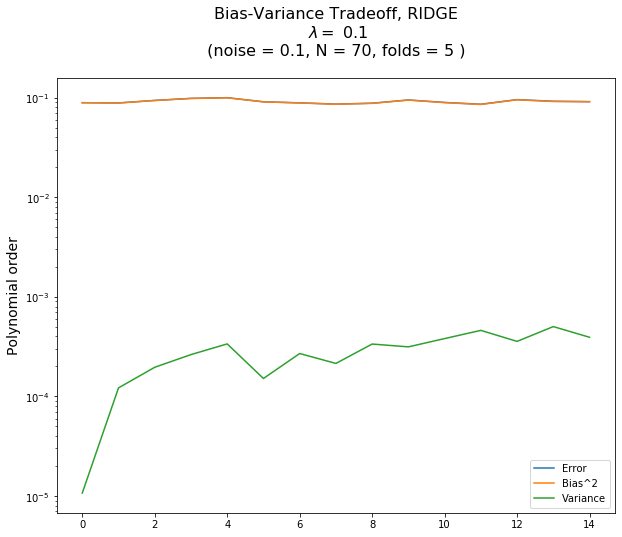

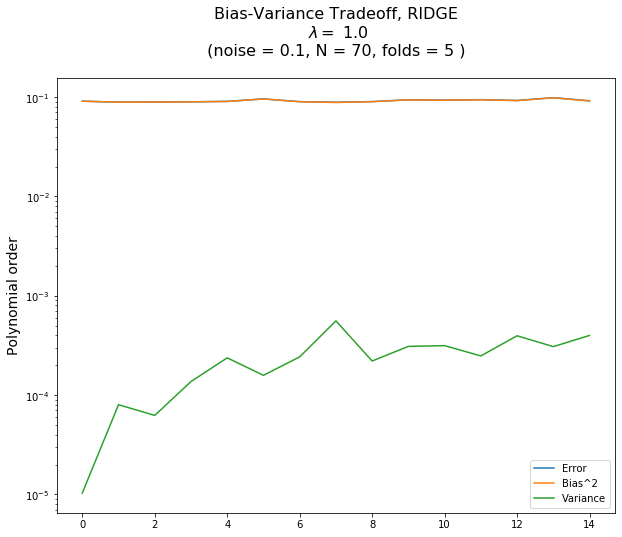

# LASSO BOOTSTRAPPING

In [29]:
from sklearn import linear_model
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Lambda
lamb = np.logspace(-5,2,8)
# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
        
        
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.346808872741303, tolerance: 0.0993239084785996
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.698432939540112, tolerance: 0.10325035765755998
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.45302254633243, tolerance: 0.10266455772101502
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.354436333748243, tolerance: 0.10178868239119027
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.70043424170961, tolerance: 0.09999917157761995
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.37572744449211, tolerance: 0.09962833864887806
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.43050935140449, tolerance: 0.09996873196427572
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.669189404572712, tolerance: 0.10635870112808885
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.137269563130115, tolerance: 0.10474016886927698
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.314679661033846, tolerance: 0.10365710416605611
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.287725783486014, tolerance: 0.10024074015767369
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.005537184007743, tolerance: 0.0982714523495529
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.83958629461976, tolerance: 0.10309337393534614
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.964690401629, tolerance: 0.09962288102514281
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.861101560538245, tolerance: 0.10001864120970574
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.47005924789785, tolerance: 0.09977183678646866
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.13876800812302, tolerance: 0.10070453764361753
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.040682629160308, tolerance: 0.10053352438461213
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.90056036804251, tolerance: 0.10485185600792156
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.321099976103074, tolerance: 0.09612245917944749
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.073077196999044, tolerance: 0.10274840445248688
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.80695668576385, tolerance: 0.10193597967757967
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.729399570675938, tolerance: 0.09994640028785207
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.638856482466874, tolerance: 0.0997752788231726
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.400742660357075, tolerance: 0.10345968730275186
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.02615695907301, tolerance: 0.09983722962624798
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.171399414632212, tolerance: 0.1028390697044532
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.153068392574077, tolerance: 0.10308292230736818
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.352571119655686, tolerance: 0.10490674623260472
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.159843531458506, tolerance: 0.10678737320402439
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.36413829580684, tolerance: 0.10033268521423877
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.805633429881617, tolerance: 0.10225006074735393
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.940755752879568, tolerance: 0.10272810092733123
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.826960744202083, tolerance: 0.1029521211459198
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.53307791560471, tolerance: 0.09924988075765946
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.375619891245865, tolerance: 0.09884641285573825
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.441231538617963, tolerance: 0.10254608629122805
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.05429962039151, tolerance: 0.1016706689631385
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.46548432014974, tolerance: 0.10115725229614188
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.02636144475933, tolerance: 0.10055512164235596
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.630219247604497, tolerance: 0.09745010424620916
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.186711441120448, tolerance: 0.10145412309060332
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.70315981138055, tolerance: 0.09925117526258145
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.28730427568645, tolerance: 0.0961151310174595
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.78476323247627, tolerance: 0.1007437618968106
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.624710260794135, tolerance: 0.0971293136000437
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.58158220090949, tolerance: 0.10223979140737294
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.669173639019036, tolerance: 0.10118300884972165
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.4419742467163, tolerance: 0.09775412686532875
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.332227588935286, tolerance: 0.1005868195816413
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.304688301455275, tolerance: 0.09890177966876397
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.17484195703876, tolerance: 0.10055567649007513
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.19508741292971, tolerance: 0.10212466632177633
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.951530570785618, tolerance: 0.09724141367164577
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.399006035637512, tolerance: 0.10491535270623804
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.684276648305243, tolerance: 0.09938626110079098
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.548485690145153, tolerance: 0.10097022181909143
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.289926128855164, tolerance: 0.10137839412077831
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.927519077205243, tolerance: 0.09750588590512706
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.204193081643044, tolerance: 0.10273077924973714
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.61596389293274, tolerance: 0.10048996222536054
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.206311776493784, tolerance: 0.10157052362228487
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.715946595264743, tolerance: 0.10460812091567541
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.43104544394025, tolerance: 0.1022412570768245
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.906185872511113, tolerance: 0.1011132405287992
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.526130833531223, tolerance: 0.09980129876553392
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.436696027600064, tolerance: 0.10037818158876563
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.509562583288147, tolerance: 0.10768209515628983
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.373736765502024, tolerance: 0.10079936274869795
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.208420918237355, tolerance: 0.10066418370430606
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.162677856976057, tolerance: 0.10525243638426986
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.744891051601478, tolerance: 0.10301177241052478
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.593565061084899, tolerance: 0.10366618218568943
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.625978650614197, tolerance: 0.10366724448531227
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.224645263196543, tolerance: 0.10511947399275473
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.669172291082695, tolerance: 0.1053969061473337
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.661515183940462, tolerance: 0.10276703179997385
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.469901106363668, tolerance: 0.1045216892991833
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.26156970350712, tolerance: 0.09661122388976248
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.676636434250547, tolerance: 0.09925540109000104
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.900497298923057, tolerance: 0.09910291404431847
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.246349244621708, tolerance: 0.1009496451318929
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.139307734644234, tolerance: 0.10238301058557604
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.19156121829652, tolerance: 0.10099137313063644
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.44131556063272, tolerance: 0.10478216996585754
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.665804656205296, tolerance: 0.10197275309496238
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.7159803867193, tolerance: 0.10241572423880999
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.377563071703975, tolerance: 0.10138073007030549
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.644019845357818, tolerance: 0.10526298037208617
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.236284531154382, tolerance: 0.10728604390966355
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.882687189522365, tolerance: 0.10130860781929944
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.84511680849306, tolerance: 0.09670782949953502
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.05223731887989, tolerance: 0.09828944949159277
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.841552644431378, tolerance: 0.10333210766010258
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.36131894728573, tolerance: 0.0971467795617798
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.825494758232054, tolerance: 0.1004887435257281
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.599257026036945, tolerance: 0.10138102517805472
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.953805539066707, tolerance: 0.1023374050731041
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.5645667568171, tolerance: 0.10650939454776318
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.752263521329688, tolerance: 0.10402803767950157
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.272484307016676, tolerance: 0.1030434392076138
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.579059241373916, tolerance: 0.09953474846424493
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.18971942571269, tolerance: 0.10543296605264914
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.082166050968176, tolerance: 0.09981817102287223
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.335185533451877, tolerance: 0.10296030935323738
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.65581746955674, tolerance: 0.10247975495583551
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.85301134123757, tolerance: 0.1011616045875382
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.413673849498625, tolerance: 0.1051365276878345
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.624284821636884, tolerance: 0.10145527767758569
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.473218582971196, tolerance: 0.0987259703833639
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.826318187832747, tolerance: 0.10103030178031736
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.97333303701798, tolerance: 0.09842201461598925
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.855834011425436, tolerance: 0.09726343761754758
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.41502722121379, tolerance: 0.09726146269043348
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.751262573348576, tolerance: 0.09907952705824871
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.781215570001148, tolerance: 0.10439954669312625
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.079037859383924, tolerance: 0.1011968344564199
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.056000258030103, tolerance: 0.10019353019427418
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.912750554883825, tolerance: 0.09829033059844006
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.78916744471956, tolerance: 0.1043262011713356
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.073837751313985, tolerance: 0.1022733956830326
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.752753021712678, tolerance: 0.09958177504590313
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.847001706398004, tolerance: 0.10094860430830185
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.187149810052922, tolerance: 0.0976304632197257
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.558850021142952, tolerance: 0.0981466650761296
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.54181200737616, tolerance: 0.10001008521923155
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.26523094195818, tolerance: 0.09936339117086873
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.418770729013165, tolerance: 0.10424478326605734
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.81960175484317, tolerance: 0.10518988866632281
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.5577397229177, tolerance: 0.10506692865313198
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.21532650698098, tolerance: 0.10115695614750925
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.02383165527762, tolerance: 0.10187834143723977
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.589367135977426, tolerance: 0.10058742813744166
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.190296257233783, tolerance: 0.10487196870932544
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.007916274653695, tolerance: 0.10249957241219937
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.318801848589317, tolerance: 0.09884002722286743
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.501327946947246, tolerance: 0.10036941887087651
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.67483099623506, tolerance: 0.10224740149782695
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.59250697089707, tolerance: 0.10043517654751713
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.814492381750654, tolerance: 0.10201805650769356
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.660137196234714, tolerance: 0.09801061744981701
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.670003492447986, tolerance: 0.0991954609117289
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.52688676926821, tolerance: 0.10151484514706124
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.69290057037358, tolerance: 0.10000577356262531
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3580858881727522, tolerance: 0.10104009343221919
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31014030528957903, tolerance: 0.10098766136498039
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2225056233869651, tolerance: 0.09949981204888343
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5195699901342152, tolerance: 0.102306922256594
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22680184921824775, tolerance: 0.09987816797460422
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3557207843360999, tolerance: 0.09972206997914923
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9536457034586334, tolerance: 0.10090009722138976
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5982209423676466, tolerance: 0.10231842556385853
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8292983372409282, tolerance: 0.10405147755471213
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0765988585727655, tolerance: 0.09929944261373039
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2064165039890895, tolerance: 0.0999636716439753
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6806847727928016, tolerance: 0.10254051606989692
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19004243595550463, tolerance: 0.0976530543631073
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7463923484851307, tolerance: 0.10205175115340372
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5972600274929789, tolerance: 0.10245167794786872
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4858946028695499, tolerance: 0.09943451583390749
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6481061880356265, tolerance: 0.09952469359296505
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.532887301311618, tolerance: 0.09928361072290252
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8086983771454754, tolerance: 0.09864746093263349
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5786957511876665, tolerance: 0.09881900200744748
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46528859834911884, tolerance: 0.10255000755913517
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: 

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5514020748652939, tolerance: 0.09764127098617291
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6407502201836905, tolerance: 0.10142573133453762
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4905309835689309, tolerance: 0.09815108990637685
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48839425021920135, tolerance: 0.10291759433153116
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3647263562061198, tolerance: 0.09713517969954964
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43049822741785704, tolerance: 0.10112333213056267
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning:

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3667679460591273, tolerance: 0.10280349408195893
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7043249294035121, tolerance: 0.10059712454528018
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3678070261908033, tolerance: 0.09966194191169381
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3743736747448452, tolerance: 0.0989005984811697
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.018764543900545, tolerance: 0.10367978488049226
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5220175827278553, tolerance: 0.10500700269703898
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9964220128060504, tolerance: 0.1043783345568595
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7077991744534131, tolerance: 0.10091106087371772
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.710211393685853, tolerance: 0.09931367062692384
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4378267535649627, tolerance: 0.09975529410841076
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6629391756563763, tolerance: 0.09879765176612648
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0074618561193205, tolerance: 0.10101351051007959
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.548476493928149, tolerance: 0.10034633765163854
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.089724394663719, tolerance: 0.10149087512249026
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7259467732213523, tolerance: 0.10368686378428675
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.940416085752716, tolerance: 0.10175684146943159
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9648274802314489, tolerance: 0.10125817795041522
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8313953206322964, tolerance: 0.10101945358498186
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7334775816342614, tolerance: 0.10245708980214954
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3187006666138927, tolerance: 0.09973473296038962
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5841658436360859, tolerance: 0.10148612937478274
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8482928786078858, tolerance: 0.10064920462812596
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6808644256907854, tolerance: 0.09937501377165507
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9422676687754148, tolerance: 0.1109867393055399
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4807831881917934, tolerance: 0.09678881458497886
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.720974806965657, tolerance: 0.10338000919615957
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0763371886578241, tolerance: 0.09888823514573515
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5641424712296441, tolerance: 0.10580461967400911
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4747371514830547, tolerance: 0.10032975615846304
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0328199993270033, tolerance: 0.10367555070328904
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7188458806975575, tolerance: 0.10447584431325782
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8267489837616893, tolerance: 0.10058777416023973
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0598296849896656, tolerance: 0.10036190358968453
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: O

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8485184871366869, tolerance: 0.09969128124570892
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0960752360553272, tolerance: 0.10517907046558281
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4115730292237956, tolerance: 0.0996464089456177
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.684872801787911, tolerance: 0.09584235970707995
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1922964235760247, tolerance: 0.10424957458329238
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8556100227452177, tolerance: 0.10612464811916571
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Ob

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.11937655688061, tolerance: 0.10473560838477179
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3355779439159505, tolerance: 0.10159073441525866
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4239243105104151, tolerance: 0.10266981885072232
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obj

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.159726444832657, tolerance: 0.1036851461202768
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.284368032017845, tolerance: 0.09896713236831166
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2772509351049735, tolerance: 0.10353274742907766
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 10.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 100.0
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14


Text(0.5, 15.0, '$\\lambda$')

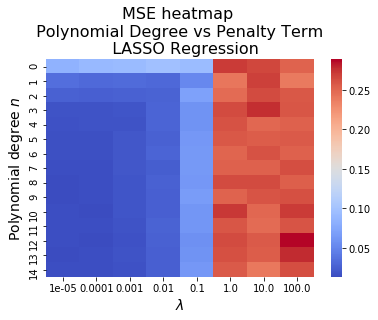

In [33]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

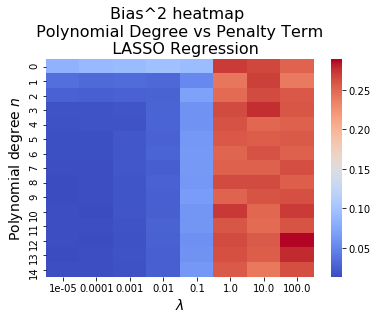

In [34]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

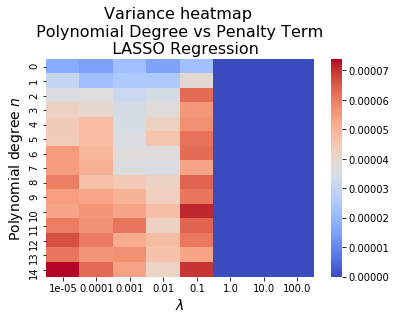

In [35]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# Terrain Data

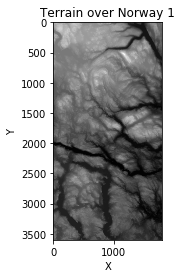

In [182]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread("SRTM_data_Norway.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Creating a Subset of the Data

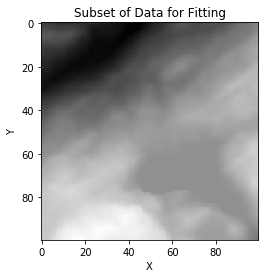

In [183]:
# Initializing the data
x_start, x_end = 800, 900
y_start, y_end = 500,600
Z =  np.array(terrain1[y_start:y_end,x_start:x_end])


plt.title("Subset of Data for Fitting")
plt.imshow(Z, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



## Reducing the resolution of the data down to N x N datapoints.


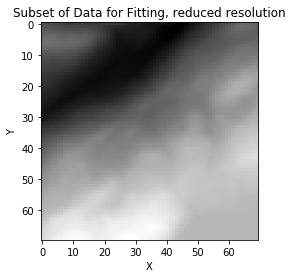

In [185]:
N = 70
x, y = np.linspace(0,1,N), np.linspace(0,1,N)
Z = fn.terrain_sampling(x,y,Z)

x, y = np.meshgrid(x,y)
plt.imshow(Z, cmap="gray")
plt.title("Subset of Data for Fitting, reduced resolution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Normalizing the data points

In [184]:
Z = (Z-np.mean(Z))/np.sqrt(np.var(Z))

# Plotting the terrain

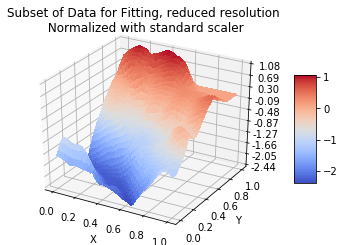

In [186]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


# Customize the z axis.
#ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Subset of Data for Fitting, reduced resolution\n Normalized with standard scaler")
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# OLS

The MSE for the prediciton is:
0.015662188019759913 

The R2 for the prediciton is:
0.9846200026023431 



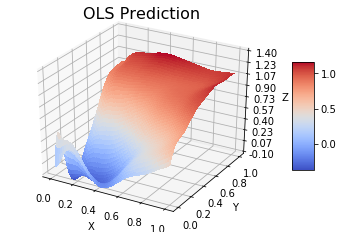

In [148]:
# Initializing the data
N = 70
test_size = 0.2
n =  10

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction')

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.02358795066924269 

The R2 for the prediciton is:
0.97666382750185 



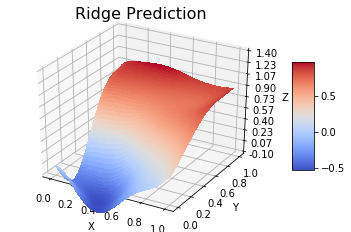

In [153]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)


# Estimating the Ridge Beta Matrix
# Inverting XTX matrix with SVD to avoid singular matrix
RIDGEbeta = fn.SVDinv((X_train.T.dot(X_train)+lamb*np.eye(X_train[0].shape[0]))).dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction')


# LASSO

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.89442004628904, tolerance: 0.7986777294233912
  positive)


The MSE for the prediciton is:
0.0775006604988919 

The R2 for the prediciton is:
0.9229860268753637 



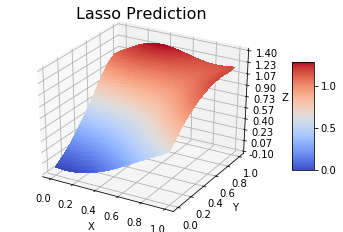

In [163]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Estimating the lasso coefficients
clf = linear_model.Lasso(alpha=lamb, fit_intercept=False)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction')


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS FOR TERRAIN DATA

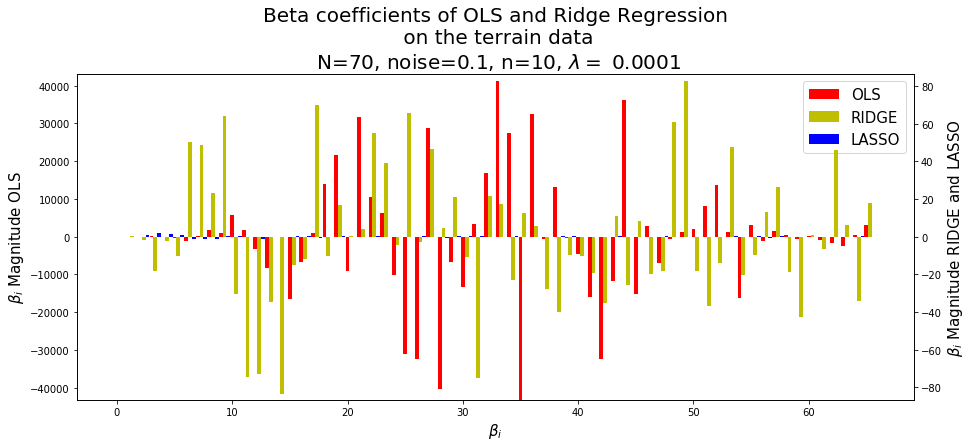

In [172]:
# Plotting the figure


#labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
#         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.33

fig, ax = plt.subplots(figsize=(15,6))

rects1 = ax.bar(ind, OLSbeta, width, color = 'r')#,yerr=2*betavar_OLS, capsize=3)
ax2 = ax.twinx()
rects2 = ax2.bar(ind+width, RIDGEbeta, width, color = 'y')#, yerr=2*betavar_RIDGE, capsize=5)

rects3 = ax2.bar(ind+2*width, LASSObeta, width, color = 'b')

ax.set_ylim(-1.05*np.max(OLSbeta),1.05*np.max(OLSbeta))
ax2.set_ylim(-1.05*np.max(RIDGEbeta),1.05*np.max(RIDGEbeta))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)
ax2.set_ylabel(r'$\beta_i$ Magnitude RIDGE and LASSO', fontsize=15)


ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Beta coefficients of OLS and Ridge Regression\n on the terrain data\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0], rects3[0]), ('OLS', 'RIDGE', 'LASSO'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



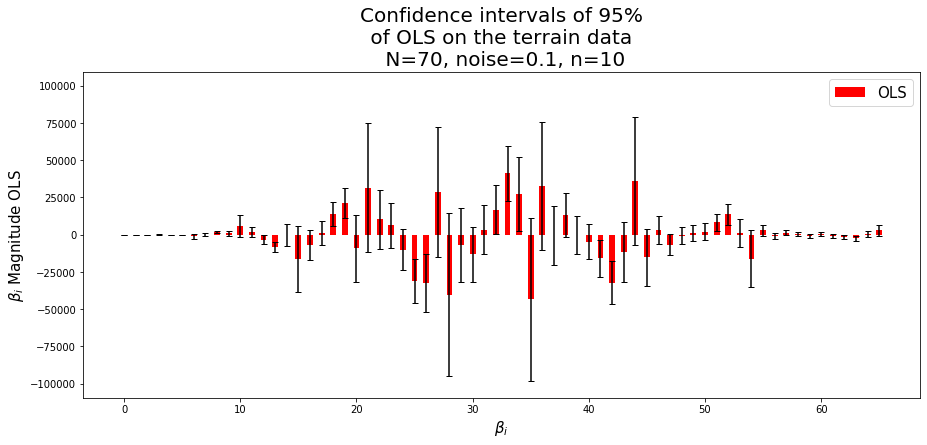

In [155]:
# Plotting the figure
ind = np.arange(len(OLSbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, OLSbeta, width, color = 'r',yerr=2*betavar_OLS, capsize=3, label='OLS')

ax.set_ylim(-4*np.max(betavar_OLS),4*np.max(betavar_OLS))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of OLS on the terrain data \n N={}, noise={}, n={}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



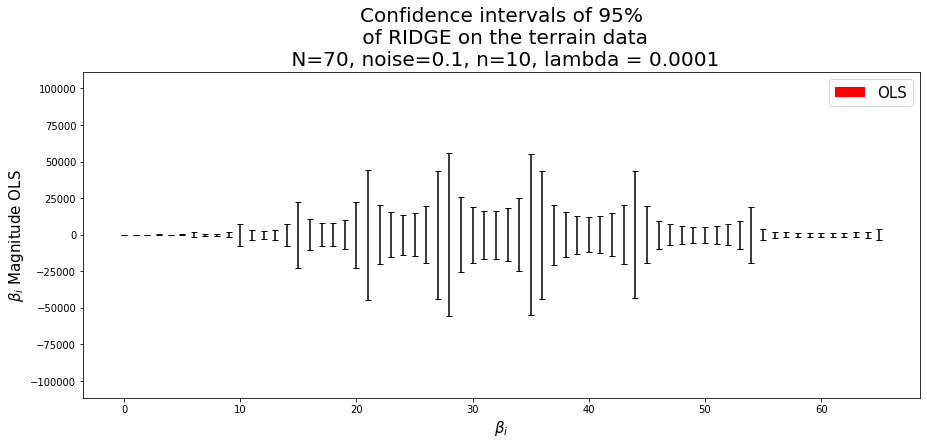

In [156]:
# Plotting the figure
ind = np.arange(len(RIDGEbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, RIDGEbeta, width, color = 'r',yerr=2*betavar_RIDGE, capsize=3, label='OLS')

ax.set_ylim(-4*np.max(betavar_RIDGE),4*np.max(betavar_RIDGE))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of RIDGE on the terrain data\n N={}, noise={}, n={}, lambda = {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')






# RIDGE BOOTSTRAPPING

In [176]:
# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0])) ).dot(x_.T).dot(z_) 
            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05


ValueError: Found input variables with inconsistent numbers of samples: [4900, 10000]

Text(0.5, 15.0, '$\\lambda$')

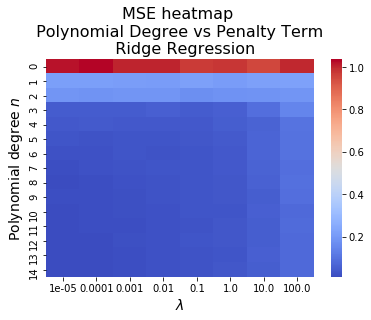

In [65]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

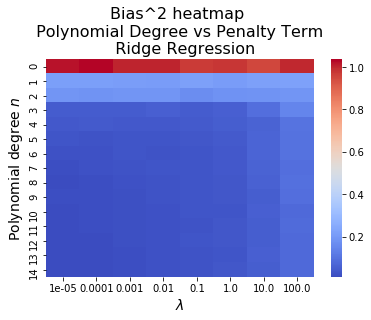

In [66]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

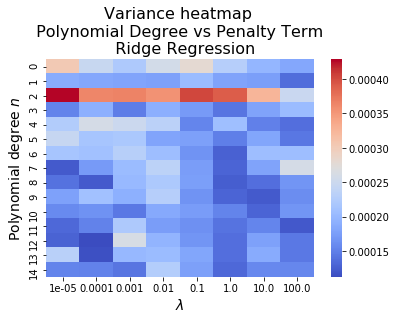

In [67]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# LASSO BOOTSTRAPPING

In [162]:
from sklearn import linear_model

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
@ignore_warnings(category=ConvergenceWarning)
# Removed warning so better display the notebook

# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
        
        
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454.0764406767007, tolerance: 0.8204108151280467
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.89818032223997, tolerance: 0.7997651243608888
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.60125223653904, tolerance: 0.7882853081706713
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.1950924266143, tolerance: 0.7911763620642995
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.73539429545065, tolerance: 0.7798439761775401
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.3294288924025, tolerance: 0.8094842726242295
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365.13750554801044, tolerance: 0.8108069987179787
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.56943066126894, tolerance: 0.7921220575258651
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.5219925796997, tolerance: 0.8040317019690499
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.0495384208347, tolerance: 0.8040307850706623
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.24172817209086, tolerance: 0.7870174751978269
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.3742435925473, tolerance: 0.8225536647346211
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.776659331283, tolerance: 0.7955500472818111
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.60723658550074, tolerance: 0.8112946212596595
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365.76729725636045, tolerance: 0.812730165627024
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.2973730644967, tolerance: 0.816404223814351
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.27456601170104, tolerance: 0.8231859314201817
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.92526315782175, tolerance: 0.7983976459659914
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.52857537169655, tolerance: 0.8023248235265235
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.7371652447957, tolerance: 0.7958100214795528
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.3891379782434, tolerance: 0.8120239403054234
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.12485341335986, tolerance: 0.813213815223772
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.1869477495552, tolerance: 0.7968106107337211
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313.4885696484578, tolerance: 0.8105752046671855
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.92776904843674, tolerance: 0.7992001476703854
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.0434426854907, tolerance: 0.7859866839738332
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.3882664094591, tolerance: 0.7938710537411316
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.8546702365361, tolerance: 0.8025791435997051
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.3972620481775, tolerance: 0.8090045962497205
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.00086363728695, tolerance: 0.8108755021444599
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.5549955853983, tolerance: 0.8078295940653416
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315.60253086007873, tolerance: 0.8101711036315122
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315.1900778478021, tolerance: 0.8131559368557415
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308.5039938942445, tolerance: 0.8059895244512135
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315.9783469678411, tolerance: 0.8048406254130841
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308.83354567473896, tolerance: 0.8193049773146787
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.76578753719355, tolerance: 0.7962663504499534
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.7338228892854, tolerance: 0.8072724946898987
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.4774049239475, tolerance: 0.8048636417194474
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.83432237817277, tolerance: 0.8091190862683819
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.78302710170556, tolerance: 0.8180796084949861
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9152505107076, tolerance: 0.7999470040385471
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306.17668142540316, tolerance: 0.7970324850766003
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.7241209681184, tolerance: 0.7905257347026643
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.9087652298262, tolerance: 0.8001015128973896
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311.06178683800056, tolerance: 0.7953598324869467
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.96146721304933, tolerance: 0.7864800766096336
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297.13757060456624, tolerance: 0.7730662267885882
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.4929677964655, tolerance: 0.7685632578199739
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298.495230622037, tolerance: 0.8043951948205388
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298.1715895890758, tolerance: 0.801838855043899
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298.28048278379447, tolerance: 0.7938543427241841
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.6470482296874, tolerance: 0.7964192867839996
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.5375560561937, tolerance: 0.8318487537298883
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 12


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.257621665684, tolerance: 0.810757687135129
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.8161328278827, tolerance: 0.7802821023455119
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.66962102695817, tolerance: 0.8031018126981186
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297.0170787078748, tolerance: 0.8177761148019974
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.47826023370976, tolerance: 0.8093352494663312
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.33014745862795, tolerance: 0.7901951953234346
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 13


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.29290701752706, tolerance: 0.7980471770401736
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.9871484802879, tolerance: 0.8069263807941722
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.060302748826, tolerance: 0.8039684110227064
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.3166482942288, tolerance: 0.791797586166486
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.0601353901228, tolerance: 0.7978167423825976
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.09056691947916, tolerance: 0.802144542477442
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

n equals 14


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.4197950015848, tolerance: 0.8042485778076149
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.3954888581846, tolerance: 0.8118081260329427
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.75528279848544, tolerance: 0.7853160233160212
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.90430397188976, tolerance: 0.8178627475262096
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.0385659699041, tolerance: 0.7991605820845238
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.81302767874445, tolerance: 0.8143366956448219
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.4559052265223, tolerance: 0.8049588413952242
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.3722473433036, tolerance: 0.7808652414441368
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.7095905281973, tolerance: 0.8067576784542784
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.82964406320116, tolerance: 0.7743279341173007
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.6801604907961, tolerance: 0.8057418943531246
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265.8291680598308, tolerance: 0.7904448159334206
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 4


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313.32259523231, tolerance: 0.7988960512179236
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.1290521081114, tolerance: 0.7933398715933659
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.2104860067362, tolerance: 0.801496134602725
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective 

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.4720249501883, tolerance: 0.7893595149985891
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.7939866742418, tolerance: 0.7882297508206958
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.06258142770906, tolerance: 0.7989118066676388
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

n equals 5


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.0738358986696, tolerance: 0.8081467249379833
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.00237931737547, tolerance: 0.8088929374375307
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.25639420370504, tolerance: 0.8130172563165883
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.80123667144045, tolerance: 0.8032094748834049
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.76637694383004, tolerance: 0.8201264268391862
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.3284157658136, tolerance: 0.7838201579852591
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 6


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.2534967723987, tolerance: 0.8082959097901945
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.7104024659599, tolerance: 0.7838444894698658
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.84232793382705, tolerance: 0.8229834666126635
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.39666222321836, tolerance: 0.7824342293689511
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.7622553056528, tolerance: 0.8093499821851905
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.41581847085126, tolerance: 0.7835039278039835
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 7


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.03469623073613, tolerance: 0.7961558315151904
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.96714005992595, tolerance: 0.7865939446052665
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.63204677364513, tolerance: 0.8064032698294908
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Obje

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.0649935244198, tolerance: 0.7795306055126434
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.183388620104, tolerance: 0.7913758656517559
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.44752110596244, tolerance: 0.7928846760360712
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 8


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.68419495086164, tolerance: 0.7964908864849489
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.2844466356838, tolerance: 0.8152192313136722
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.83404278904936, tolerance: 0.7859382805141626
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.27646528609876, tolerance: 0.7853335301716833
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.4619468106801, tolerance: 0.8081937042441361
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.343427740714, tolerance: 0.8093073884313262
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

n equals 9


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.5365780093019, tolerance: 0.7933452044429922
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.3421308863152, tolerance: 0.8147980308717927
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.9792223085664, tolerance: 0.7983647540680897
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.0736420168426, tolerance: 0.7957004037907691
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.85249402089687, tolerance: 0.8091420434653337
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.14314798475294, tolerance: 0.7935175901705807
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 10


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.1624092142588, tolerance: 0.7844862074927377
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.6626735575311, tolerance: 0.8053042706459624
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.53817736189444, tolerance: 0.8131170382103915
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Object

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.9319436948592, tolerance: 0.8119918494719222
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.45747130261503, tolerance: 0.8043619062388344
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.48753484058255, tolerance: 0.7999564013873728
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objec

n equals 11


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.4889590205614, tolerance: 0.7819740592789444
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.8434085601437, tolerance: 0.8110872530639408
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.5493780791912, tolerance: 0.8006570025704846
  positive)
C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objecti

KeyboardInterrupt: 

Text(0.5, 15.0, '$\\lambda$')

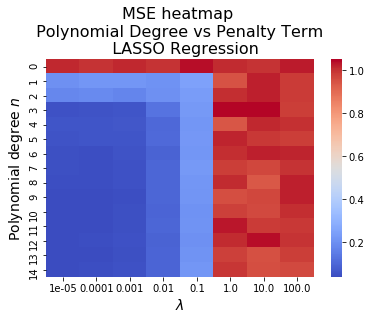

In [69]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

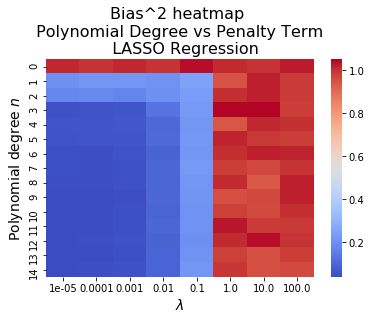

In [70]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

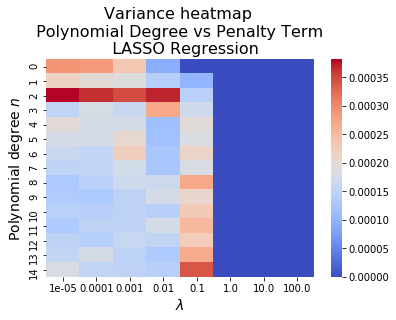

In [71]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)